<p>Solve the following problem once with <strong>decision trees</strong> and the other with <strong>random forests</strong></p>
<a href='https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish'>kaggle link</a>

### About the Data:
<div class="markdown-converter__text--rendered"><h3>Context</h3>
<p>Studying top products requires more than just product listings. You also need to know what sells well and what does not.</p>
<h3>Content</h3>
<p>This dataset contains product listings as well as products <strong>ratings</strong> and <strong>sales performance</strong>, which you would not find in other datasets.</p>
<p>With this, you can finally start to look for correlations and patterns regarding the success of a product and the various components.</p>
<h3>Inspiration</h3>
<ul>
<li>How about trying to validate the established idea of human sensitiveness to price drops ? (discounted <code>price</code> compared to original <code>retail_price</code>)</li>
<li>You may look for top categories of products so that you know what sells best</li>
<li>Do bad products sell ? How about the relationship between the quality of a product (ratings) and its success ? Does the price factor into this ?</li>
</ul>
<h3>Collection Methodology</h3>
<p>The data comes from the <a href="wish.com">Wish</a> platform.<br>
Basically, the products listed in the dataset are those that would appear if you type "summer" in the search field of the platform.</p>
<p>You can browse the Wish website or app to get a feel of the type of information you can get from there and how they are presented. This might give you some ideas and a better understanding.</p>
<p>If you are confused about some columns, you can either look at the column descriptions, browse <a href="wish.com">the Wish website</a>/app, or you can ask in the comments.</p>
<p>The data was scraped with <em>french</em> as settings (hence the presence of some non-ascii latin characters such as « <em>é</em> » and « <em>à</em> ») in the <code>title</code> column.</p>
<h3>Features and Columns</h3>
<p>The data was scraped in the <em>french localisation</em> (hence some non-ascii latin characters such as « <em>é</em> » and « <em>à</em> ») in the <code>title</code> column.</p>
<p>The <code>title_orig</code> on the other hand contains the original title (the base title) that is displayed by default. When a translation is provided by the seller, it appears in the <code>title</code> column. When the <code>title</code> and <code>title_orig</code> columns are the same, it generally means that the seller did not specify a translation that would be displayed to users with french settings.</p>
<p><em>A picture is worth a thousand words</em>. In the following screenshot you see some features and how to interpret them.</p>
<p><img alt="Search results page and columns explained" src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1488294%2F308810459ae5232399672ba3eef228ef%2Fannotated-search-results-wish-website.jpg?generation=1598785563117062&amp;alt=media"></p></div>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import sys

In [2]:
%cd D:\data\Sales of summer clothes in E-commerce Wish

D:\data\Sales of summer clothes in E-commerce Wish


In [3]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is 0676-C2E1

 Directory of D:\data\Sales of summer clothes in E-commerce Wish

09/08/2022  05:37 PM    <DIR>          .
09/08/2022  05:37 PM    <DIR>          ..
09/08/2022  05:37 PM    <DIR>          keywords-niches_2021-04
09/08/2022  05:37 PM    <DIR>          keywords-popular_2021-04
05/03/2021  11:55 PM         1,236,963 summer-products-with-rating-and-performance_2020-08.csv
05/03/2021  11:55 PM            33,775 unique-categories.csv
05/03/2021  11:55 PM            39,384 unique-categories.sorted-by-count.csv
               3 File(s)      1,310,122 bytes
               4 Dir(s)  382,573,977,600 bytes free


In [5]:
# read data
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

# check data
display(df.head())

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [7]:
# data description
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [8]:
# check null values
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [10]:
# columns that contain null values
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

In [13]:
# percentage of null values in null_columns sorted
df[null_columns].isnull().sum().sort_values(ascending=False)/len(df)


merchant_profile_picture     0.856325
has_urgency_banner           0.699301
urgency_text                 0.699301
rating_five_count            0.028608
rating_four_count            0.028608
rating_three_count           0.028608
rating_two_count             0.028608
rating_one_count             0.028608
product_color                0.026065
origin_country               0.010807
product_variation_size_id    0.008900
merchant_name                0.002543
merchant_info_subtitle       0.000636
dtype: float64

In [24]:
# drop columns that contain null values more than 50%
#returning the dataframe with the nun columns dropped
def drop_nun_columns_more_than_50_percent_missing(df):
    nun_columns = df.isnull().sum()
    nun_columns = nun_columns[nun_columns > len(df) * 0.5]
    nun_columns.sort_values(inplace=True)
    df.drop(nun_columns.index, axis=1, inplace=True)
    return df

# drop columns that contain null values more than 50%
df = drop_nun_columns_more_than_50_percent_missing(df)

# drop unnecessary columns
df.drop(['merchant_info_subtitle', 'merchant_name', 'product_url', 'theme', 'crawl_month'], axis=1, inplace=True)


In [25]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum().sort_values(ascending=False)

rating_five_count            45
rating_four_count            45
rating_three_count           45
rating_two_count             45
rating_one_count             45
product_color                41
origin_country               17
product_variation_size_id    14
dtype: int64

In [26]:
# unique values in each null_columns
for col in null_columns:
    print(col, df[col].nunique())


rating_five_count 605
rating_four_count 440
rating_three_count 384
rating_two_count 262
rating_one_count 330
product_color 101
product_variation_size_id 106
origin_country 6


In [28]:
# fill null values in columns with mean
df= df.fillna(df.mean())

# check null values
df.isnull().sum()

C:\Users\CompuMisr\AppData\Local\Temp\ipykernel_18496\3151919514.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df= df.fillna(df.mean())


title                            0
title_orig                       0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count                0
rating_four_count                0
rating_three_count               0
rating_two_count                 0
rating_one_count                 0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  17
merchant_title      

In [29]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum().sort_values(ascending=False)

product_color                41
origin_country               17
product_variation_size_id    14
dtype: int64

In [30]:
# dtypes of null_columns
df[null_columns].dtypes

product_color                object
product_variation_size_id    object
origin_country               object
dtype: object

In [31]:
# fill null values in columns with mode
for col in null_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# check null values
df.isnull().sum()

title                           0
title_orig                      0
price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_ratin

In [32]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [33]:
# check for duplicates
df.duplicated().sum()

232

In [34]:
# drop duplicates
df.drop_duplicates(inplace=True)


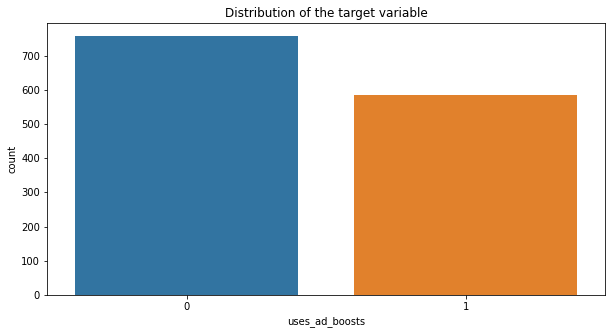

In [35]:
# visualizing the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.countplot(x='uses_ad_boosts', data=df)
plt.title('Distribution of the target variable')
plt.show()

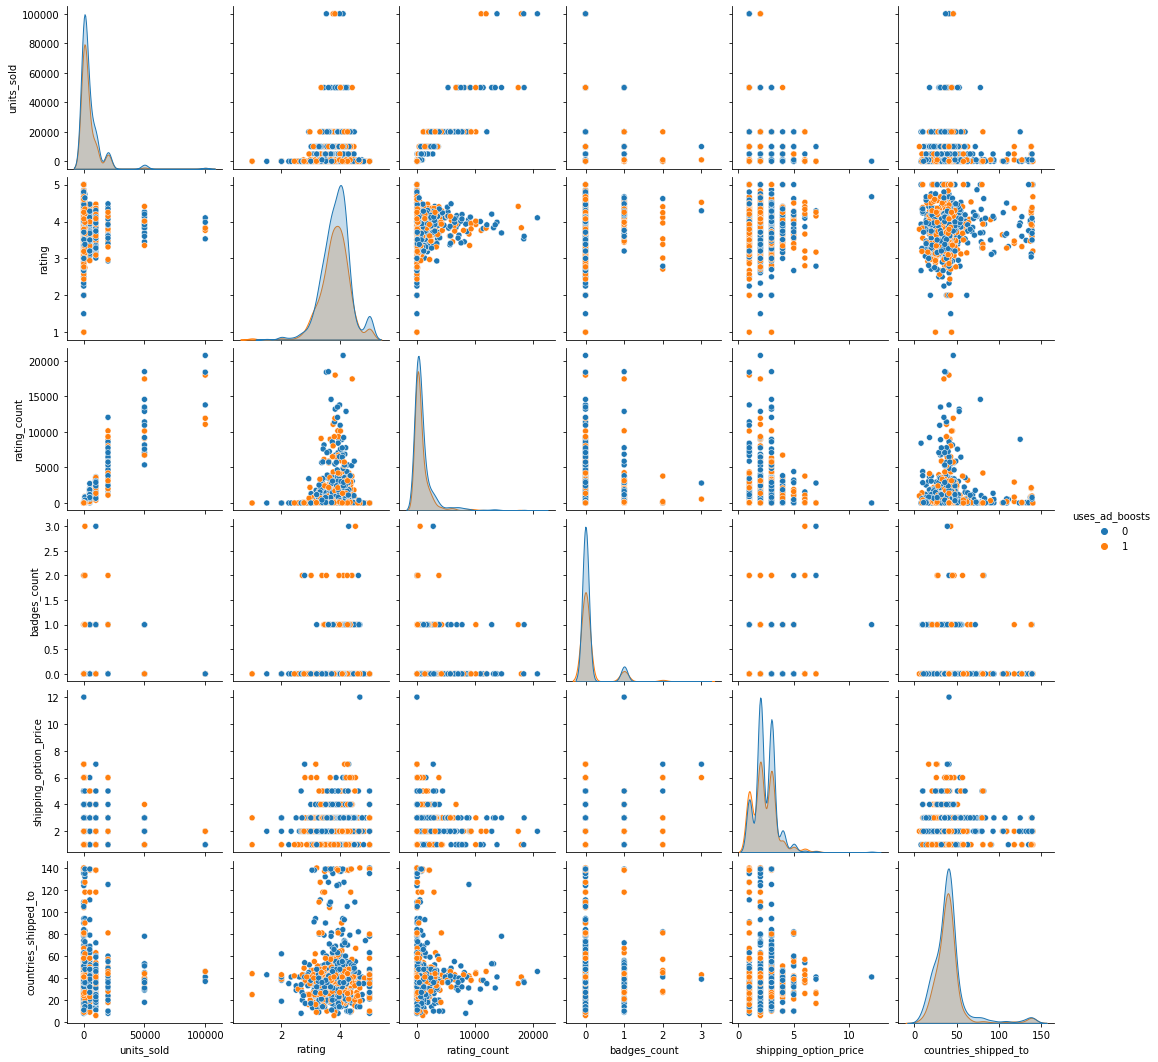

In [39]:
# pairplot of uses_ad_boosts
sns.pairplot(df, hue='uses_ad_boosts', vars=['units_sold', 'rating', 'rating_count', 'badges_count', 'shipping_option_price', 'countries_shipped_to'])
plt.show()

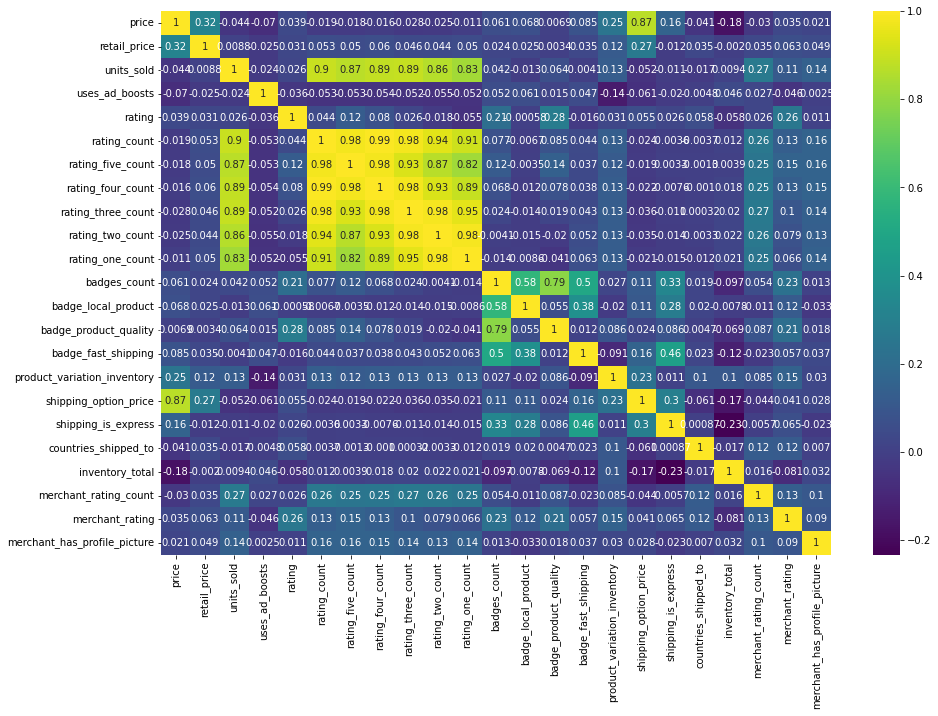

In [41]:
# correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [42]:
# split data into features and target
X = df.drop('uses_ad_boosts', axis=1)
y = df['uses_ad_boosts']

In [45]:
# function to return numerical and categorical columns
def get_num_cat_cols(df):
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns
    return num_cols, cat_cols

# get numerical and categorical columns
num_cols, cat_cols = get_num_cat_cols(X)

print('Numerical columns: ', num_cols)
print('Categorical columns: ', cat_cols)

Numerical columns:  Index(['price', 'retail_price', 'units_sold', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')
Categorical columns:  Index(['title', 'title_orig', 'currency_buyer', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name', 'origin_country',
       'merchant_title', 'merchant_id', 'product_picture', 'product_id'],
      dtype='object')


In [46]:
# normalize numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [47]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(le.fit_transform)


In [48]:
X.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,rating,rating_count,rating_five_count,rating_four_count,...,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_picture,product_id
0,154,163,0.312500,0.051793,0,0.000990,0.6900,0.002603,0.002251,0.001927,...,0.208955,1.0,1,924,0.000261,0.673195,533,0.0,1051,1051
1,935,1042,0.145833,0.083665,0,0.199992,0.6125,0.295748,0.196484,0.247351,...,0.261194,1.0,1,284,0.008163,0.587377,143,0.0,62,62
2,140,134,0.145833,0.167331,0,0.000990,0.6425,0.000675,0.000433,0.000963,...,0.223881,1.0,1,571,0.000136,0.621186,808,0.0,1086,1086
3,534,335,0.145833,0.027888,0,0.049990,0.7575,0.027912,0.025546,0.028661,...,0.261194,1.0,1,407,0.010958,0.632663,465,0.0,547,547
4,398,1013,0.035833,0.007968,0,0.000990,0.5250,0.000964,0.000520,0.000963,...,0.216418,1.0,1,898,0.006659,0.625596,640,0.0,1221,1221


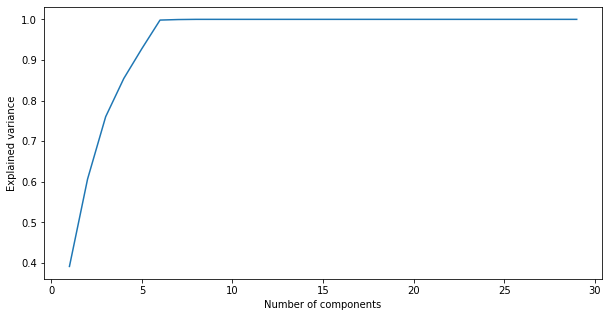

In [50]:
# PCA
from sklearn.decomposition import PCA

# find the number of components and plot the explained variance
n_components = []
explained_variance = []
for i in range(1, 30):
    pca = PCA(n_components=i)
    pca.fit(X)
    n_components.append(i)
    explained_variance.append(pca.explained_variance_ratio_.sum())

plt.figure(figsize=(10, 5))
plt.plot(n_components, explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [51]:
# PCA with 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)


In [52]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#print the shape of the train and test data
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1072, 10)
X_test shape:  (269, 10)
y_train shape:  (1072,)
y_test shape:  (269,)


In [53]:
# import decision tree classifier and random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import accuracy score, confusion matrix, classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# function to train and test the model
def train_test_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))
    print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
    print('Classification report: ', classification_report(y_test, y_pred))



In [54]:
# train and test models

models = [DecisionTreeClassifier(), RandomForestClassifier()]

for model in models:
    print(model)
    train_test_model(model, X_train, X_test, y_train, y_test)
    print('')

DecisionTreeClassifier()
Accuracy score:  0.550185873605948
Confusion matrix:  [[92 69]
 [52 56]]
Classification report:                precision    recall  f1-score   support

           0       0.64      0.57      0.60       161
           1       0.45      0.52      0.48       108

    accuracy                           0.55       269
   macro avg       0.54      0.54      0.54       269
weighted avg       0.56      0.55      0.55       269


RandomForestClassifier()
Accuracy score:  0.5613382899628253
Confusion matrix:  [[112  49]
 [ 69  39]]
Classification report:                precision    recall  f1-score   support

           0       0.62      0.70      0.65       161
           1       0.44      0.36      0.40       108

    accuracy                           0.56       269
   macro avg       0.53      0.53      0.53       269
weighted avg       0.55      0.56      0.55       269




In [55]:
# split the X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of the train and test data
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1072, 34)
X_test shape:  (269, 34)
y_train shape:  (1072,)
y_test shape:  (269,)


In [56]:
# train and test models

models = [DecisionTreeClassifier(), RandomForestClassifier()]

for model in models:
    print(model)
    train_test_model(model, X_train, X_test, y_train, y_test)
    print('')

DecisionTreeClassifier()
Accuracy score:  0.6356877323420075
Confusion matrix:  [[112  49]
 [ 49  59]]
Classification report:                precision    recall  f1-score   support

           0       0.70      0.70      0.70       161
           1       0.55      0.55      0.55       108

    accuracy                           0.64       269
   macro avg       0.62      0.62      0.62       269
weighted avg       0.64      0.64      0.64       269


RandomForestClassifier()
Accuracy score:  0.6765799256505576
Confusion matrix:  [[134  27]
 [ 60  48]]
Classification report:                precision    recall  f1-score   support

           0       0.69      0.83      0.75       161
           1       0.64      0.44      0.52       108

    accuracy                           0.68       269
   macro avg       0.67      0.64      0.64       269
weighted avg       0.67      0.68      0.66       269


